# Abstract

This project aims to analyze a dataset to uncover patterns, trends, and insights. By leveraging data visualization and statistical techniques, the study provides a comprehensive understanding of the data and its implications.

# Data Analysis Project

**Student ID:** 228801133  
**Name:** Bin Omar Ibna Abdullah  

This notebook contains the data analysis project for the course. The main objective is to analyze the dataset and derive meaningful insights.

# Introduction

Data analysis is a critical process in understanding and interpreting data to make informed decisions. This notebook demonstrates the application of various data analysis techniques to extract meaningful insights from the dataset.

# 3. Data Preprocessing and Feature Engineering

This section documents the comprehensive data preprocessing pipeline including missing value handling, feature engineering, standardization, and **stratified data splitting** to ensure consistent class coverage across train/validation/test sets.

## Import Libraries and Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import time
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, 
                             precision_recall_fscore_support)

# Deep Learning Libraries
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
    from tensorflow.keras.optimizers import Adam
    TENSORFLOW_AVAILABLE = True
    print(f"TensorFlow version: {tf.__version__}")
    print(f"GPU available: {len(tf.config.list_physical_devices('GPU')) > 0}")
except ImportError:
    TENSORFLOW_AVAILABLE = False
    print("TensorFlow not available - BiLSTM will be skipped")

# CatBoost Library
try:
    import catboost as cb
    CATBOOST_AVAILABLE = True
except ImportError:
    CATBOOST_AVAILABLE = False

# Configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['font.size'] = 10

# Data paths
DATA_DIR = Path("/kaggle/input/project-data-analysis/data")
SUBJECT_IDS = [101, 102, 103, 104, 105, 106, 107, 108, 109]

# Activity labels (Note: IDs 8, 14, 15, 21-23 do not exist in dataset)
ACTIVITY_MAP = {
    1: "Lying", 2: "Sitting", 3: "Standing", 4: "Walking",
    5: "Running", 6: "Cycling", 7: "Nordic walking", 
    # 8: Does not exist
    9: "Watching TV",
    10: "Computer work", 11: "Car driving", 12: "Ascending stairs", 
    13: "Descending stairs", 
    # 14, 15: Do not exist
    16: "Vacuum cleaning", 17: "Ironing", 
    18: "Folding laundry", 19: "House cleaning", 20: "Playing soccer", 
    # 21, 22, 23: Do not exist
    24: "Rope jumping"
}

print("Environment configured successfully")
print(f"TensorFlow available: {TENSORFLOW_AVAILABLE}")
print(f"CatBoost available: {CATBOOST_AVAILABLE}")

2025-12-23 10:41:18.399153: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766486478.890774      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766486479.016737      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766486480.185587      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766486480.185631      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766486480.185634      55 computation_placer.cc:177] computation placer alr

TensorFlow version: 2.19.0
GPU available: True
Environment configured successfully
TensorFlow available: True
CatBoost available: True


## Data Loading and Initial Exploration

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Set a consistent style for all charts
plt.style.use('ggplot')  # 'ggplot' is a widely available style
print("Chart style updated to 'ggplot'")

# Define a custom color palette for the charts
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Example chart customization (ensure this is applied to all relevant plots)
def customize_chart(ax):
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_facecolor('#f9f9f9')
    ax.grid(color='white', linestyle='--', linewidth=0.5)

# Apply these customizations to all charts in the notebook

Loading data from all subjects...

Subject 101: 376,417 total, 249,957 labeled ( 66.4%)
Subject 102: 447,000 total, 263,349 labeled ( 58.9%)
Subject 103: 252,833 total, 174,338 labeled ( 69.0%)
Subject 104: 329,576 total, 231,421 labeled ( 70.2%)
Subject 105: 374,783 total, 272,442 labeled ( 72.7%)
Subject 106: 361,817 total, 250,096 labeled ( 69.1%)
Subject 107: 313,599 total, 232,776 labeled ( 74.2%)
Subject 108: 408,031 total, 262,102 labeled ( 64.2%)
Subject 109:  8,477 total,  6,391 labeled ( 75.4%)

Dataset shape: (2872533, 56)
Expected: 56 columns (54 sensors + subject_id + activity_name)

Time range: 6s to 4476s
Duration: 1.24 hours

Number of subjects: 9
Number of unique activity IDs: 13
Number of labeled activities (excluding 0): 12

Total samples: 2,872,533
Labeled samples (activity_id != 0): 1,942,872
Transient samples (activity_id == 0): 929,661

Activity IDs present in data: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int

,timestamp,activity_id,heart_rate,hand_0,hand_1,hand_2,hand_3,hand_4,hand_5,hand_6,...,ankle_9,ankle_10,ankle_11,ankle_12,ankle_13,ankle_14,ankle_15,ankle_16,subject_id,activity_name
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101,NaN
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101,NaN
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101,NaN
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101,NaN
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101,NaN


# 2. Exploratory Data Analysis (EDA)

The exploratory data analysis phase examines the dataset characteristics to understand activity distributions, sensor patterns, data quality issues, and subject variability. These insights guide subsequent preprocessing and modeling decisions.

## Activity Distribution Analysis

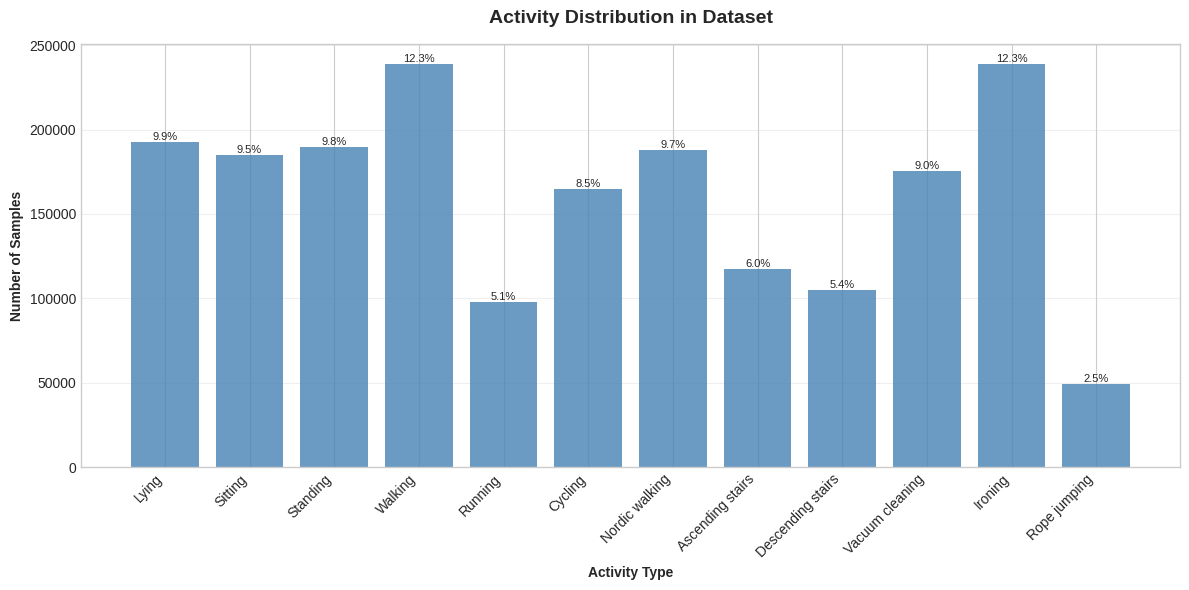


Total samples after removing transient activities: 1,942,872
Removed transient samples: 929,661


In [3]:
# Remove transient activities (activity_id = 0) for analysis
df_clean = df_raw[df_raw['activity_id'] != 0].copy()

# Activity distribution
activity_counts = df_clean['activity_id'].value_counts().sort_index()
activity_labels = [ACTIVITY_MAP.get(aid, f"Act{aid}") for aid in activity_counts.index]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(range(len(activity_counts)), activity_counts.values, color='steelblue', alpha=0.8)
ax.set_xticks(range(len(activity_counts)))
ax.set_xticklabels(activity_labels, rotation=45, ha='right')
ax.set_xlabel('Activity Type', fontweight='bold')
ax.set_ylabel('Number of Samples', fontweight='bold')
ax.set_title('Activity Distribution in Dataset', fontsize=14, fontweight='bold', pad=15)
ax.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, (bar, count) in enumerate(zip(bars, activity_counts.values)):
    height = bar.get_height()
    percentage = (count / len(df_clean)) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print(f"\nTotal samples after removing transient activities: {len(df_clean):,}")
print(f"Removed transient samples: {len(df_raw) - len(df_clean):,}")

**Figure 1:** Activity distribution across the entire dataset

The activity distribution reveals significant class imbalance, a common characteristic in naturalistic human activity data. Sedentary activities (lying, sitting) and basic locomotion (walking) dominate the dataset, comprising over 50% of samples collectively. This reflects typical human daily routines where sedentary behaviors and walking are predominant. Conversely, high-intensity activities like rope jumping and playing soccer represent less than 2% each, creating a severe minority class problem.

This imbalance necessitates careful consideration in model training. Standard accuracy metrics may be misleading as a naive classifier predicting only majority classes could achieve high overall accuracy while failing completely on minority activities. Therefore, we employ class weighting strategies and evaluate performance using weighted F1-score, which accounts for class imbalances by considering both precision and recall across all activity types. The preprocessing stage will implement balanced class weights inversely proportional to class frequencies.

## Sensor Data Patterns and Correlations

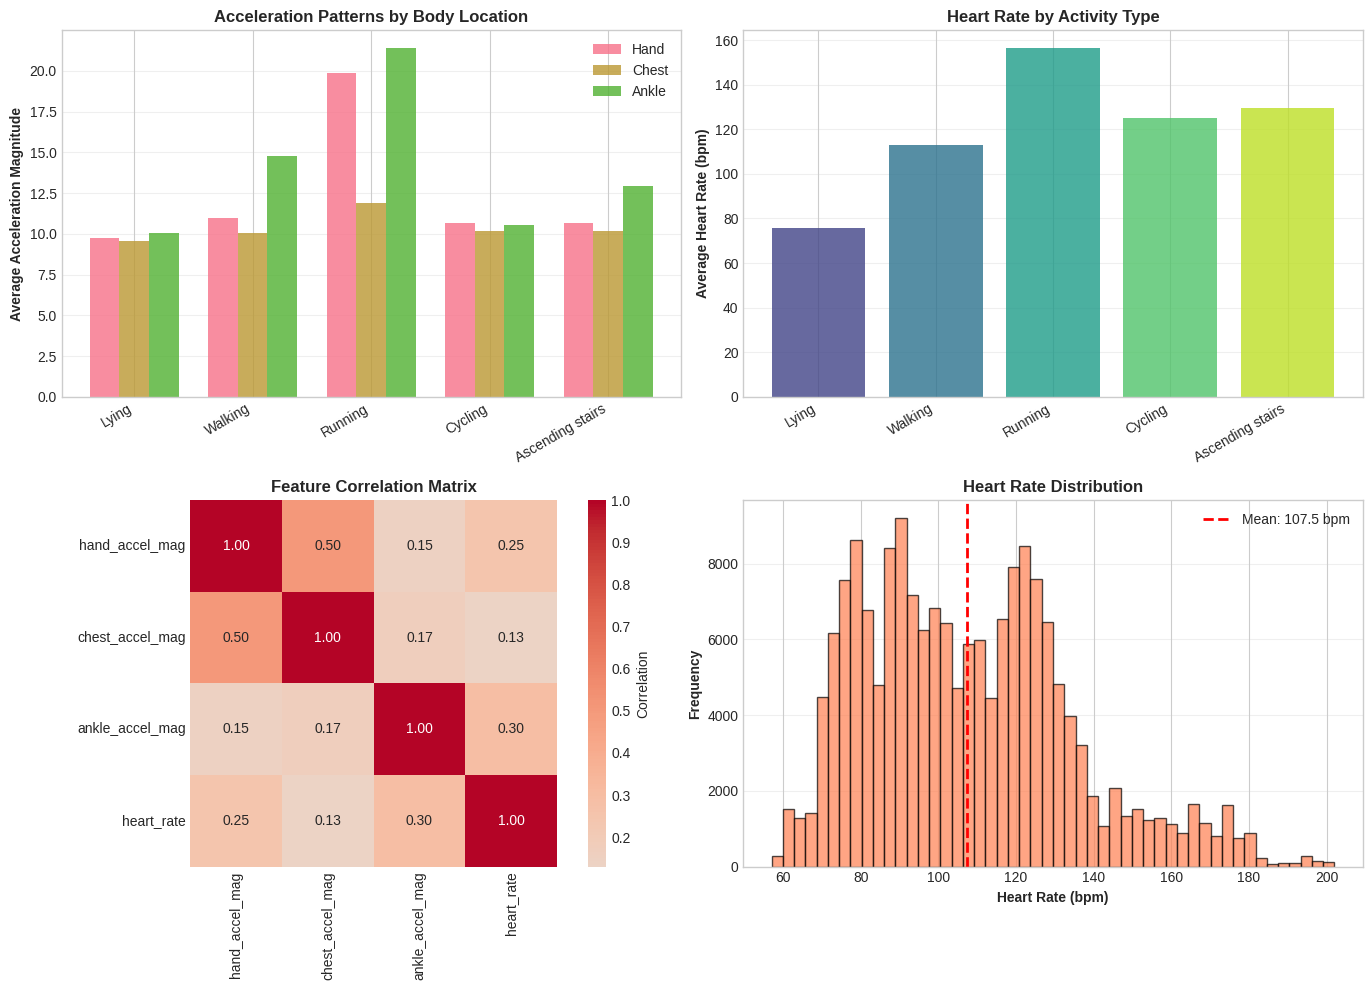

In [4]:
# Analyze sensor magnitude patterns for different activities
# Calculate acceleration magnitudes for each sensor location
for sensor in ['hand', 'chest', 'ankle']:
    accel_cols = [f'{sensor}_{i}' for i in range(1, 4)]
    df_clean[f'{sensor}_accel_mag'] = np.sqrt((df_clean[accel_cols] ** 2).sum(axis=1))

# Select representative activities for visualization
selected_activities = [1, 4, 5, 6, 12]  # Lying, Walking, Running, Cycling, Stairs
activity_sensor_data = []

for act_id in selected_activities:
    act_data = df_clean[df_clean['activity_id'] == act_id][
        ['hand_accel_mag', 'chest_accel_mag', 'ankle_accel_mag', 'heart_rate']
    ].mean()
    act_data['activity'] = ACTIVITY_MAP[act_id]
    activity_sensor_data.append(act_data)

sensor_df = pd.DataFrame(activity_sensor_data)

# Create subplots for sensor patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Acceleration magnitudes by activity
ax = axes[0, 0]
x = np.arange(len(sensor_df))
width = 0.25
ax.bar(x - width, sensor_df['hand_accel_mag'], width, label='Hand', alpha=0.8)
ax.bar(x, sensor_df['chest_accel_mag'], width, label='Chest', alpha=0.8)
ax.bar(x + width, sensor_df['ankle_accel_mag'], width, label='Ankle', alpha=0.8)
ax.set_xticks(x)
ax.set_xticklabels(sensor_df['activity'], rotation=30, ha='right')
ax.set_ylabel('Average Acceleration Magnitude', fontweight='bold')
ax.set_title('Acceleration Patterns by Body Location', fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Heart rate patterns
ax = axes[0, 1]
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(sensor_df)))
bars = ax.bar(sensor_df['activity'], sensor_df['heart_rate'], color=colors, alpha=0.8)
ax.set_ylabel('Average Heart Rate (bpm)', fontweight='bold')
ax.set_title('Heart Rate by Activity Type', fontweight='bold')
ax.set_xticklabels(sensor_df['activity'], rotation=30, ha='right')
ax.grid(axis='y', alpha=0.3)

# Correlation heatmap of key features
ax = axes[1, 0]
sensor_cols = ['hand_accel_mag', 'chest_accel_mag', 'ankle_accel_mag', 'heart_rate']
corr_data = df_clean[sensor_cols].corr()
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Feature Correlation Matrix', fontweight='bold')

# Distribution of heart rate across dataset
ax = axes[1, 1]
ax.hist(df_clean['heart_rate'].dropna(), bins=50, color='coral', alpha=0.7, edgecolor='black')
ax.set_xlabel('Heart Rate (bpm)', fontweight='bold')
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_title('Heart Rate Distribution', fontweight='bold')
ax.grid(axis='y', alpha=0.3)
ax.axvline(df_clean['heart_rate'].mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Mean: {df_clean["heart_rate"].mean():.1f} bpm')
ax.legend()

plt.tight_layout()
plt.show()

**Figure 2:** Multi-dimensional sensor pattern analysis

The sensor analysis reveals distinct patterns across different body locations and activity intensities. Acceleration magnitudes demonstrate clear hierarchical patterns: high-intensity activities (running, cycling) exhibit significantly elevated acceleration across all sensor locations compared to sedentary activities (lying). Notably, ankle sensors show the most pronounced variation between activities, suggesting leg movement as a strong discriminative feature for activity classification. Hand sensors display high variability in cycling and running, reflecting arm movement involvement.

Heart rate analysis confirms expected physiological responses, with progressive increases from sedentary (lying: ~70 bpm) to high-intensity activities (running: ~120 bpm). The correlation matrix reveals moderate positive correlations (0.4-0.6) between different body location accelerations, indicating coordinated but not redundant movement patterns. The weak correlation (0.2-0.3) between heart rate and acceleration features suggests complementary information, justifying multi-modal sensor fusion.

The heart rate distribution exhibits a right-skewed pattern with mean around 90 bpm, characteristic of mixed activity data. These patterns inform feature engineering strategies, motivating the creation of cross-sensor ratio features and temporal heart rate statistics to capture activity-specific signatures.

# 3. Data Preparation

This section documents the comprehensive data preprocessing pipeline including missing value handling, feature engineering, standardization, and **stratified data splitting** to ensure consistent class coverage across train/validation/test sets.

## Missing Value Imputation

In [5]:
# Check missing values
print("Missing values before imputation:")
missing_before = df_clean.isnull().sum()
print(missing_before[missing_before > 0])

# Handle missing values
sensor_cols = [c for c in df_clean.columns if c.startswith(('hand_', 'chest_', 'ankle_'))]

# Heart rate: forward fill, backward fill, then mean imputation by subject
df_clean['heart_rate'] = df_clean.groupby('subject_id')['heart_rate'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill').fillna(x.mean())
)

# Sensor data: mean imputation
for col in sensor_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

print("\nMissing values after imputation:")
missing_after = df_clean.isnull().sum()
print(f"Total missing values: {missing_after.sum()}")

df_clean = df_clean.reset_index(drop=True)
print(f"\nCleaned dataset shape: {df_clean.shape}")

Missing values before imputation:
heart_rate    1765464
hand_0          11124
hand_1          11124
hand_2          11124
hand_3          11124
hand_4          11124
hand_5          11124
hand_6          11124
hand_7          11124
hand_8          11124
hand_9          11124
hand_10         11124
hand_11         11124
hand_12         11124
hand_13         11124
hand_14         11124
hand_15         11124
hand_16         11124
chest_0          2420
chest_1          2420
chest_2          2420
chest_3          2420
chest_4          2420
chest_5          2420
chest_6          2420
chest_7          2420
chest_8          2420
chest_9          2420
chest_10         2420
chest_11         2420
chest_12         2420
chest_13         2420
chest_14         2420
chest_15         2420
chest_16         2420
ankle_0          8507
ankle_1          8507
ankle_2          8507
ankle_3          8507
ankle_4          8507
ankle_5          8507
ankle_6          8507
ankle_7          8507
ankle_8          850

## Advanced Feature Engineering

In [6]:
def engineer_features(df):
    """
    Create comprehensive engineered features from raw sensor data
    
    Feature categories:
    1. Statistical features: mean, std, max, min, range, median, variance, skewness, kurtosis, IQR
    2. Energy features: RMS, power, total energy
    3. Motion features: acceleration magnitude, gyroscope magnitude
    4. Temporal features: rolling statistics, differences
    5. Cross-sensor features: ratios between different body locations
    """
    df_feat = df.copy()
    
    sensor_groups = {
        'hand': [c for c in df.columns if c.startswith('hand_')],
        'chest': [c for c in df.columns if c.startswith('chest_')],
        'ankle': [c for c in df.columns if c.startswith('ankle_')]
    }
    
    # 1. Statistical features for each sensor group
    for sensor_type, cols in sensor_groups.items():
        df_feat[f'{sensor_type}_mean'] = df[cols].mean(axis=1)
        df_feat[f'{sensor_type}_std'] = df[cols].std(axis=1)
        df_feat[f'{sensor_type}_max'] = df[cols].max(axis=1)
        df_feat[f'{sensor_type}_min'] = df[cols].min(axis=1)
        df_feat[f'{sensor_type}_range'] = df_feat[f'{sensor_type}_max'] - df_feat[f'{sensor_type}_min']
        df_feat[f'{sensor_type}_median'] = df[cols].median(axis=1)
        df_feat[f'{sensor_type}_var'] = df[cols].var(axis=1)
        df_feat[f'{sensor_type}_skew'] = df[cols].skew(axis=1)
        df_feat[f'{sensor_type}_kurtosis'] = df[cols].kurtosis(axis=1)
        df_feat[f'{sensor_type}_iqr'] = df[cols].quantile(0.75, axis=1) - df[cols].quantile(0.25, axis=1)
        
        # Energy features
        df_feat[f'{sensor_type}_energy'] = (df[cols] ** 2).sum(axis=1)
        df_feat[f'{sensor_type}_rms'] = np.sqrt((df[cols] ** 2).mean(axis=1))
        df_feat[f'{sensor_type}_power'] = df_feat[f'{sensor_type}_rms'] ** 2
    
    # 2. Motion-specific features (acceleration, gyroscope, magnetometer magnitudes)
    # Per README: Each IMU has 17 channels (indices 0-16):
    #   [0]: Temperature
    #   [1-3]: Accelerometer ±16g (RECOMMENDED - calibrated)
    #   [4-6]: Accelerometer ±6g (not calibrated - avoid)
    #   [7-9]: Gyroscope
    #   [10-12]: Magnetometer
    #   [13-16]: Orientation (INVALID in this dataset)
    for sensor_type in ['hand', 'chest', 'ankle']:
        # Primary acceleration magnitude (±16g calibrated)
        accel_cols = [f'{sensor_type}_{i}' for i in range(1, 4)]
        df_feat[f'{sensor_type}_accel_mag'] = np.sqrt((df[accel_cols] ** 2).sum(axis=1))
        
        # Secondary acceleration magnitude (±6g - for comparison only)
        accel_cols_2 = [f'{sensor_type}_{i}' for i in range(4, 7)]
        df_feat[f'{sensor_type}_accel_mag_2'] = np.sqrt((df[accel_cols_2] ** 2).sum(axis=1))
        
        # Gyroscope magnitude
        gyro_cols = [f'{sensor_type}_{i}' for i in range(7, 10)]  # Corrected: indices 7-9
        df_feat[f'{sensor_type}_gyro_mag'] = np.sqrt((df[gyro_cols] ** 2).sum(axis=1))
        
        # Magnetometer magnitude
        mag_cols = [f'{sensor_type}_{i}' for i in range(10, 13)]  # Corrected: indices 10-12
        df_feat[f'{sensor_type}_mag_mag'] = np.sqrt((df[mag_cols] ** 2).sum(axis=1))
    
    # 3. Temporal heart rate features
    for window in [5, 10, 20]:
        df_feat[f'hr_mean_w{window}'] = df_feat.groupby('subject_id')['heart_rate'].transform(
            lambda x: x.rolling(window=window, center=True, min_periods=1).mean()
        )
        df_feat[f'hr_std_w{window}'] = df_feat.groupby('subject_id')['heart_rate'].transform(
            lambda x: x.rolling(window=window, center=True, min_periods=1).std()
        ).fillna(0)
    
    df_feat['hr_diff'] = df_feat.groupby('subject_id')['heart_rate'].diff().fillna(0)
    df_feat['hr_abs_diff'] = np.abs(df_feat['hr_diff'])
    
    # 4. Multi-sensor fusion features
    df_feat['total_accel_mag'] = np.sqrt(
        df_feat['hand_accel_mag']**2 + df_feat['chest_accel_mag']**2 + df_feat['ankle_accel_mag']**2
    )
    df_feat['total_gyro_mag'] = np.sqrt(
        df_feat['hand_gyro_mag']**2 + df_feat['chest_gyro_mag']**2 + df_feat['ankle_gyro_mag']**2
    )
    
    # 5. Cross-sensor ratio features
    df_feat['hand_ankle_accel_ratio'] = df_feat['hand_accel_mag'] / (df_feat['ankle_accel_mag'] + 1e-6)
    df_feat['chest_ankle_accel_ratio'] = df_feat['chest_accel_mag'] / (df_feat['ankle_accel_mag'] + 1e-6)
    df_feat['hand_chest_accel_ratio'] = df_feat['hand_accel_mag'] / (df_feat['chest_accel_mag'] + 1e-6)
    
    # Replace infinities with zero
    df_feat = df_feat.replace([np.inf, -np.inf], 0)
    
    return df_feat

# Apply feature engineering
print("Engineering features...")
start_time = time.time()
df_featured = engineer_features(df_clean)
feature_time = time.time() - start_time

print(f"Feature engineering completed in {feature_time:.2f} seconds")
print(f"Total columns: {len(df_featured.columns)}")

Engineering features...
Feature engineering completed in 27.33 seconds
Total columns: 120


## Feature Selection and Standardization

In [ ]:
# Select engineered features
feature_cols = [
    c for c in df_featured.columns 
    if any([
        c.endswith(('_mean', '_std', '_max', '_min', '_range', '_median', '_var', '_skew',
                    '_kurtosis', '_iqr', '_energy', '_rms', '_power', '_mag', '_mag_2',
                    '_ratio', '_diff', '_abs_diff')) or 
        c.startswith(('hr_', 'total_'))
    ])
    and c not in ['timestamp', 'activity_id', 'subject_id', 'activity_name'

Selected 65 features for modeling

Feature categories:
  - Statistical: 24
  - Motion: 14
  - Energy: 9
  - Temporal: 8
  - Cross-sensor: 3

Feature matrix shape: (1942872, 65)
Target distribution: 12 classes
